### Abstract : The prediction task is to determine whether a person makes over 50K a year.

# 1. Import libraries and dataset 

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


import warnings
warnings.filterwarnings("ignore")

In [62]:
#read the dataset
census = pd.read_csv("census.csv")

In [63]:
#explore the first 5 records
census.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


### Observation:
##### Brief Obesravtion
- Age : The age of a person
- Workclass : The position a person hold or works in.
- Fnlwgt : final weight - weightage delivered from estimation of population from each state, ethinicity, race, sex, age etc...
- Education : Their highest qualification


In [64]:
# check the shape of dataset
census.shape

(32560, 15)

##### There are 32560 records and 15 columns

In [65]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### Observation:

- There are no null values in the data set 
- The TARGET VARIABLE is of type object / categorical variable

# Identify the type of model

In [66]:
# check the datatype of columns
census.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

#### Observation:

- The target column is of object type and we can categorize it as:
    - 1 for income >=50k
    - 0 for income <=50k
###### The supervised/classification

# Exploratory Data Analysis and Data Cleaning

In [67]:
census.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

### Creating a categorical DataFrame to analyse the variables

In [68]:
#copy of categorical variables 
cat_cen = census[["Workclass",'Education', 'Native_country','Income','Sex','Marital_status', 'Occupation', 'Relationship', 'Race']].copy()

In [69]:
#Display the first 5 records
cat_cen .head()

,Workclass,Education,Native_country,Income,Sex,Marital_status,Occupation,Relationship,Race
0,Self-emp-not-inc,Bachelors,United-States,<=50K,Male,Married-civ-spouse,Exec-managerial,Husband,White
1,Private,HS-grad,United-States,<=50K,Male,Divorced,Handlers-cleaners,Not-in-family,White
2,Private,11th,United-States,<=50K,Male,Married-civ-spouse,Handlers-cleaners,Husband,Black
3,Private,Bachelors,Cuba,<=50K,Female,Married-civ-spouse,Prof-specialty,Wife,Black
4,Private,Masters,United-States,<=50K,Female,Married-civ-spouse,Exec-managerial,Wife,White


In [70]:
x = ["Workclass",'Education', 'Native_country','Income','Sex','Marital_status', 'Occupation', 'Relationship', 'Race']

#analyse the Native_country column
for c in x:
    print("Unique values")
    print(cat_cen[c].unique())
    print("-----------------")
    print("Count Of values")
    print(cat_cen[c].value_counts())
    print("-----------------**-------------------")
    print("\n")
    

Unique values
[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
-----------------
Count Of values
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
-----------------**-------------------


Unique values
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
-----------------
Count Of values
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433


In [71]:
cat_cen["Workclass"] = cat_cen["Workclass"].replace(" ?", "Unknown")

In [72]:
cat_cen["Native_country"] = cat_cen["Native_country"].replace(" ?", "Unknown")

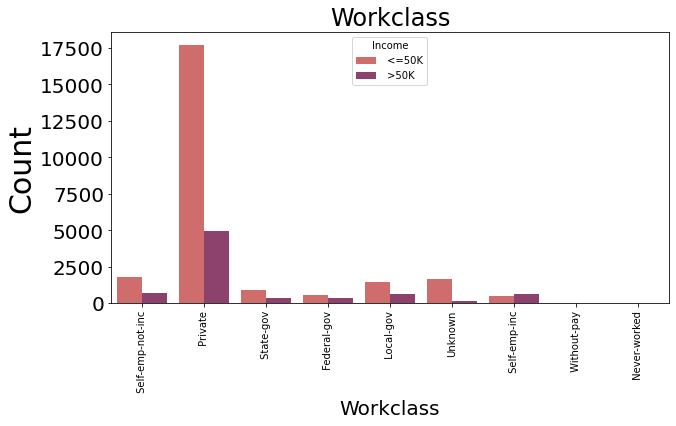

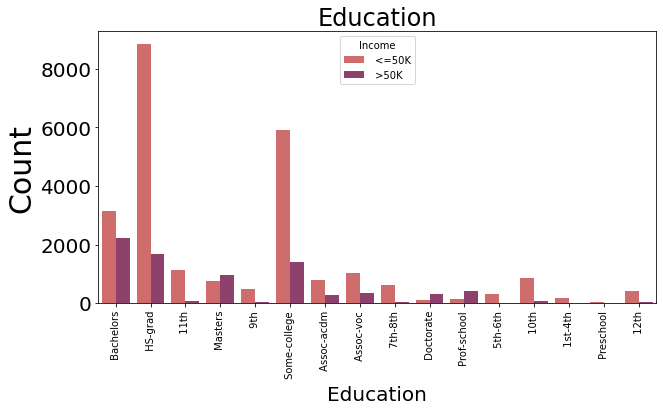

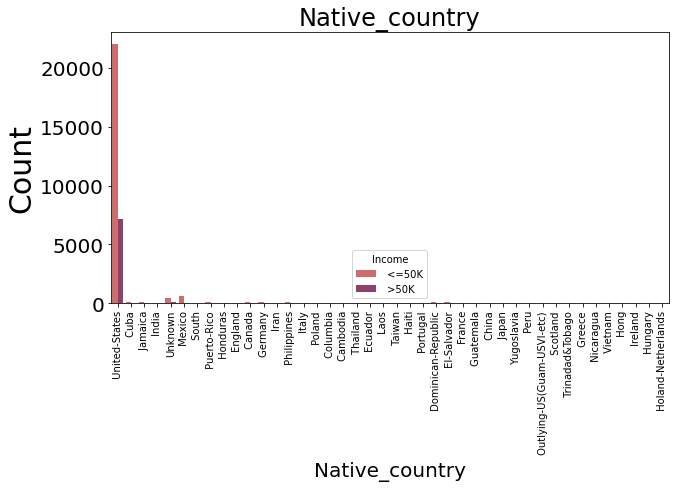

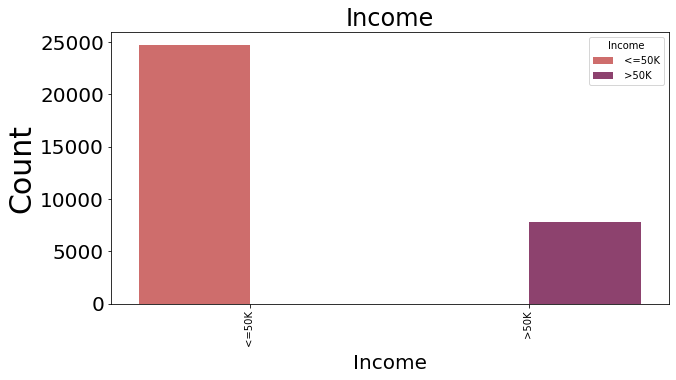

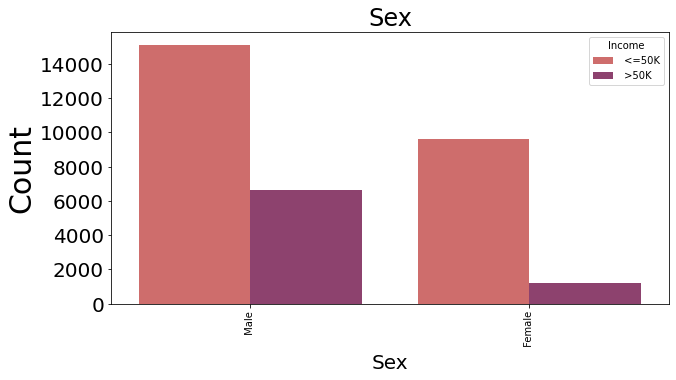

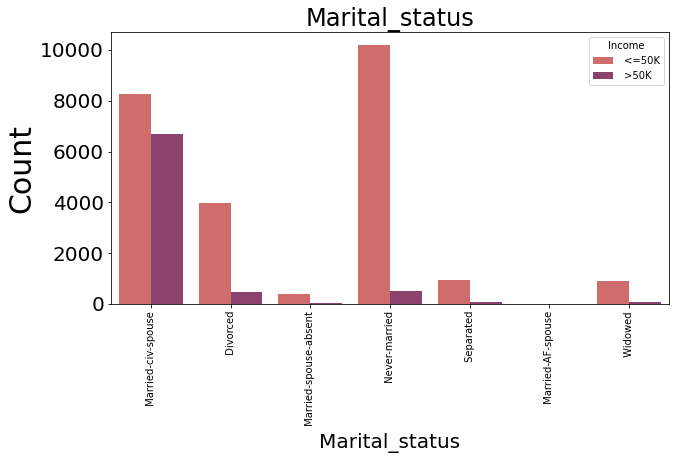

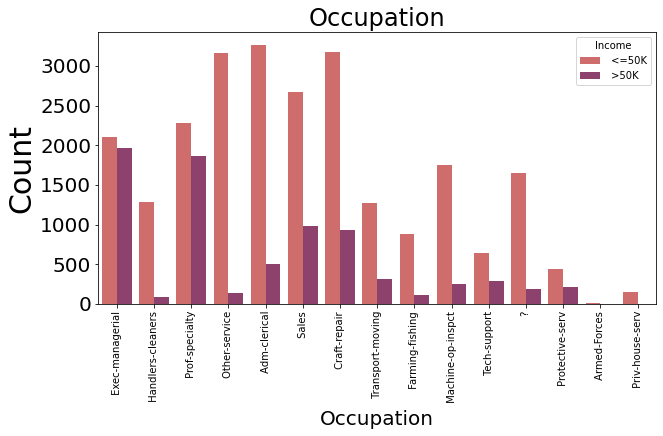

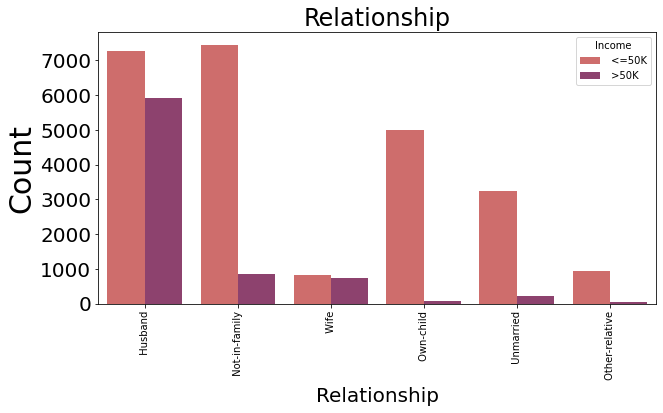

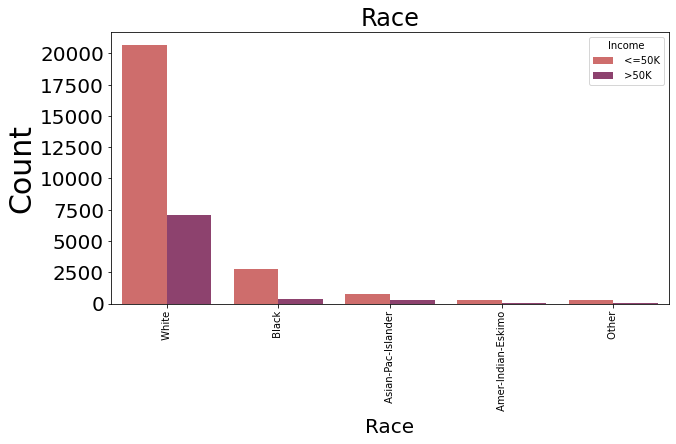

In [73]:
## Univariate Analysis

x = ["Workclass",'Education', 'Native_country','Income','Sex','Marital_status', 'Occupation', 'Relationship', 'Race']

#count plot for categorical variable Attrition

for c in x:
    fig_size = (10,5)
    fig, ax = plt.subplots(figsize = fig_size)
    sns.countplot(data=cat_cen, x=c, hue = "Income", palette="flare")
   
    plt.xticks(rotation=90)
    plt.yticks(fontsize=20)
    plt.xlabel(c,fontsize=20)
    plt.ylabel("Count",fontsize=30)
    plt.title( c , fontsize = 24)
    

# ---------------------******-----------------------
##### Workclass :
- "Workclass is majorly concentrated towards the private working class, and the population who earn less than 50k is high"

#### Education: 
- Education is majorly concentrated towards the High school graduate population earning less than 50k is high, where as, most bachelors earn >50k

#### Native_country:
- Native_country is majorly concentrated towards the US population earning less than 50k is high

#### Sex:
- Men have the highest count and they earn less than 50k is high

#### Marital_status: 
- Married couple with spouse have the highest count and they earn less than 50k is high, where as around 6000 records have married couple who earn >50k

#### Occupation:
- Executive Managers income is nearly greater than 50k, Administartive clerks hold the highest count from the entire record count but with income less than 50k,Teaching line with professor specialities have an income nearly greater than 50k

#### Relationship:
- Husbands Earn  mostly with an income nearly greater than 50k but individual without a family have income less than 50k

#### Race:
- Most of the records indicate the majority of the population is Whites. 
# ---------------------******-----------------------


# Creating a numerical dataframe with numerical columns

In [74]:
num_cen =census[['Age',  'Fnlwgt', 'Education_num',      
       'Capital_gain', 'Capital_loss', 'Hours_per_week',"Income"]].copy()

In [75]:
num_cen

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income
0,50,83311,13,0,0,13,<=50K
1,38,215646,9,0,0,40,<=50K
2,53,234721,7,0,0,40,<=50K
3,28,338409,13,0,0,40,<=50K
4,37,284582,14,0,0,40,<=50K
...,...,...,...,...,...,...,...
32555,27,257302,12,0,0,38,<=50K
32556,40,154374,9,0,0,40,>50K
32557,58,151910,9,0,0,40,<=50K
32558,22,201490,9,0,0,20,<=50K


In [76]:
x = ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week','Income']

#analyse the Native_country column
for c in x:
    print("Unique values")
    print(num_cen[c].unique())
    print("-----------------")
    print("Count Of values")
    print(num_cen[c].value_counts())
    print("-----------------**-------------------")
    print("\n")
    

Unique values
[50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
-----------------
Count Of values
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: Age, Length: 73, dtype: int64
-----------------**-------------------


Unique values
[ 83311 215646 234721 ...  34066  84661 257302]
-----------------
Count Of values
123011    13
203488    13
164190    13
121124    12
148995    12
          ..
68318      1
284211     1
312881     1
177711     1
229376     1
Name: Fnlwgt, Length: 21647, dtype: int64
-----------------**-------------------


Unique values
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
-----------------
Count Of values
9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5

### Observation
-------------------------------------------------------------------------------------------
-  Age starts from 16 and ends at 90
-  There are 898 of age 36 


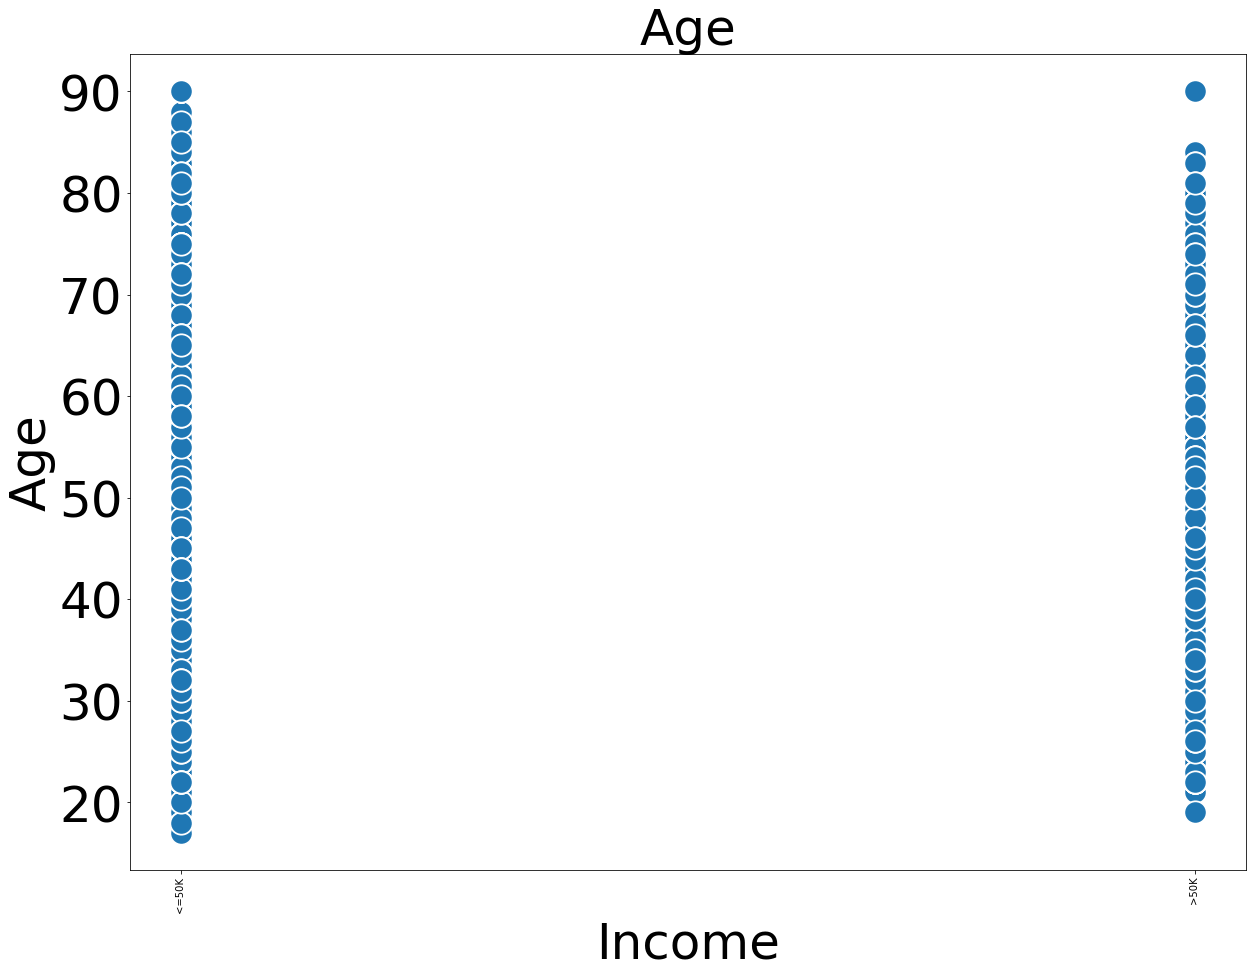

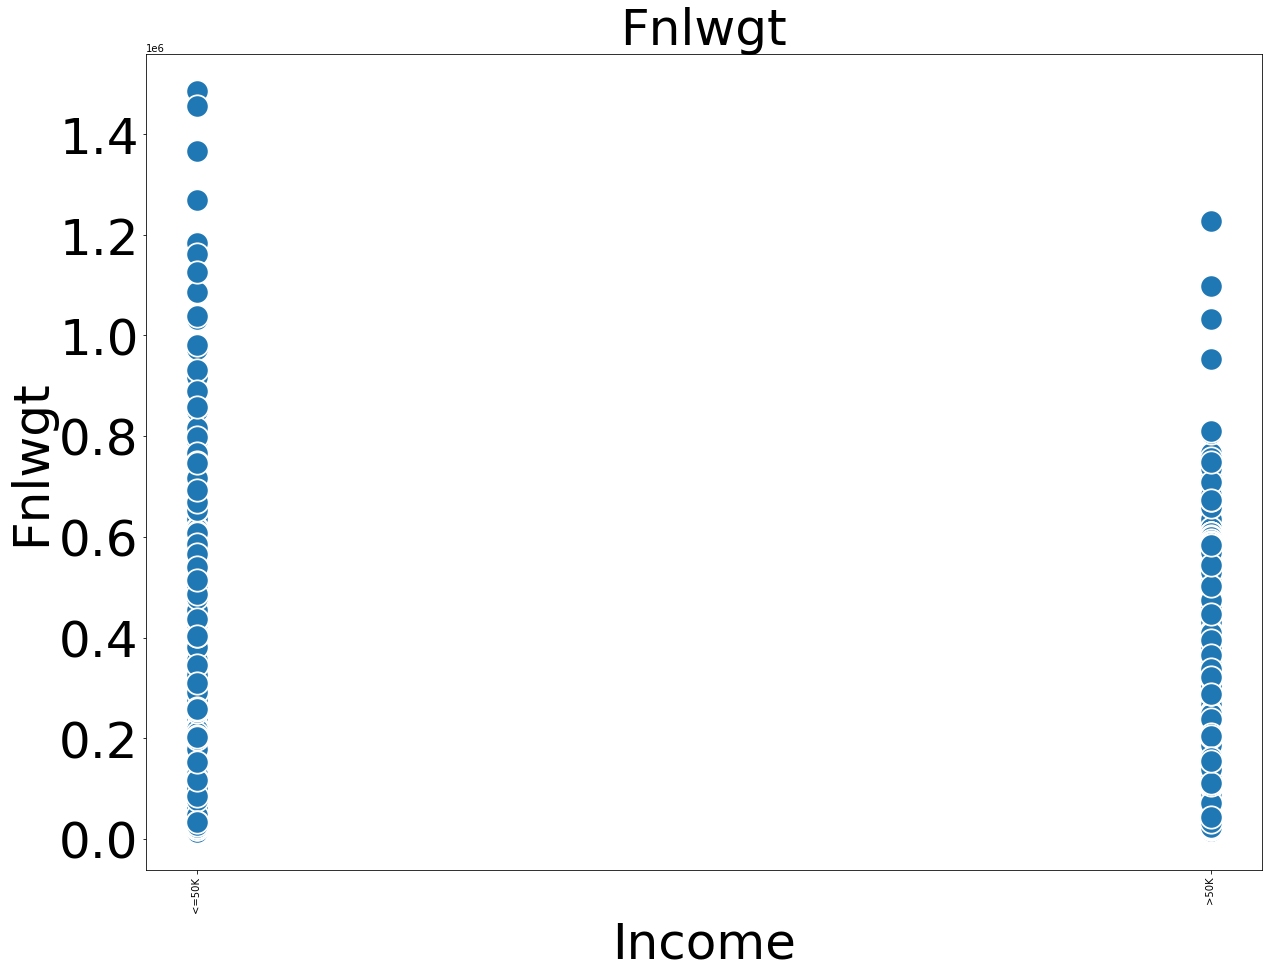

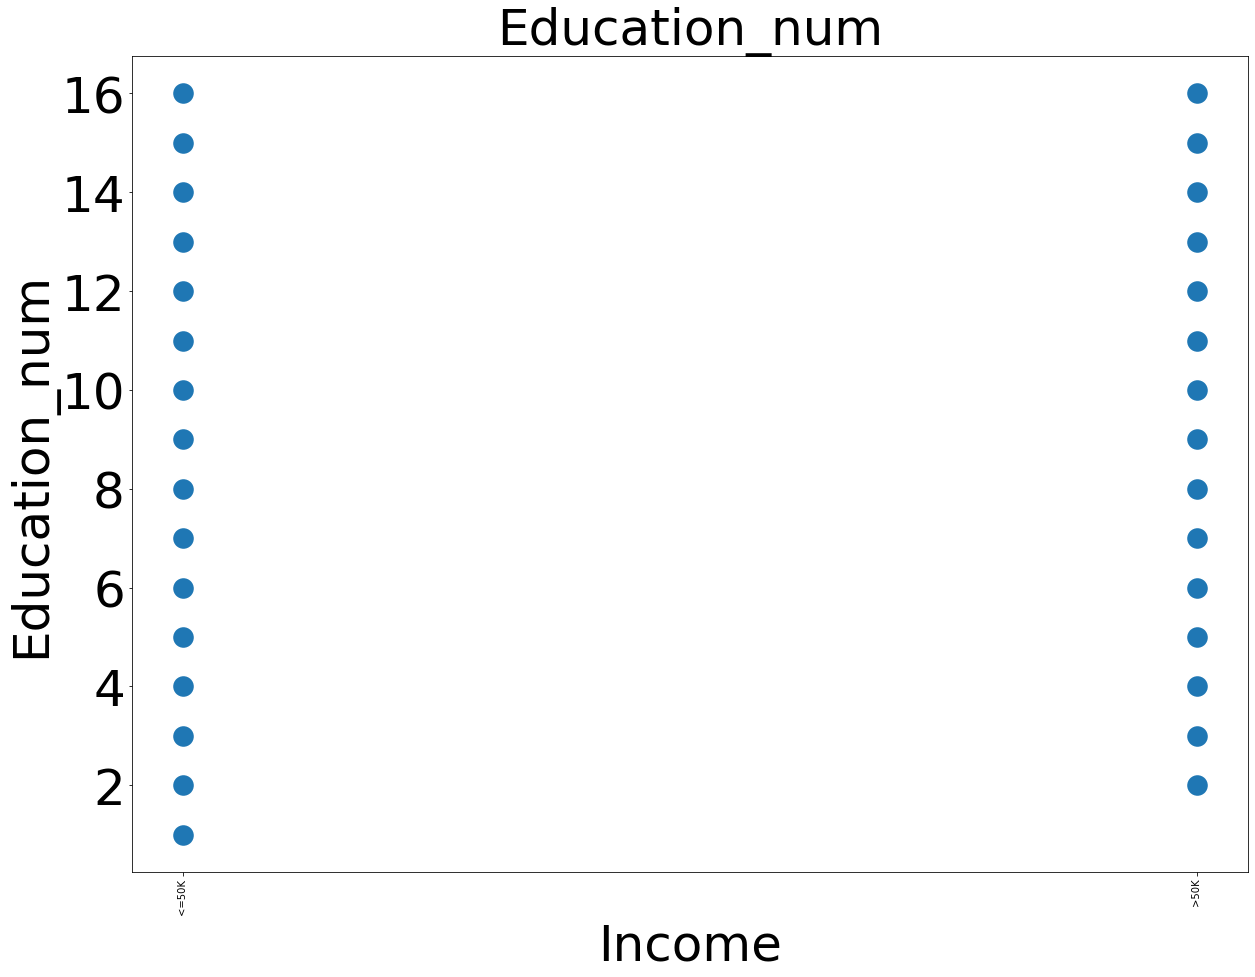

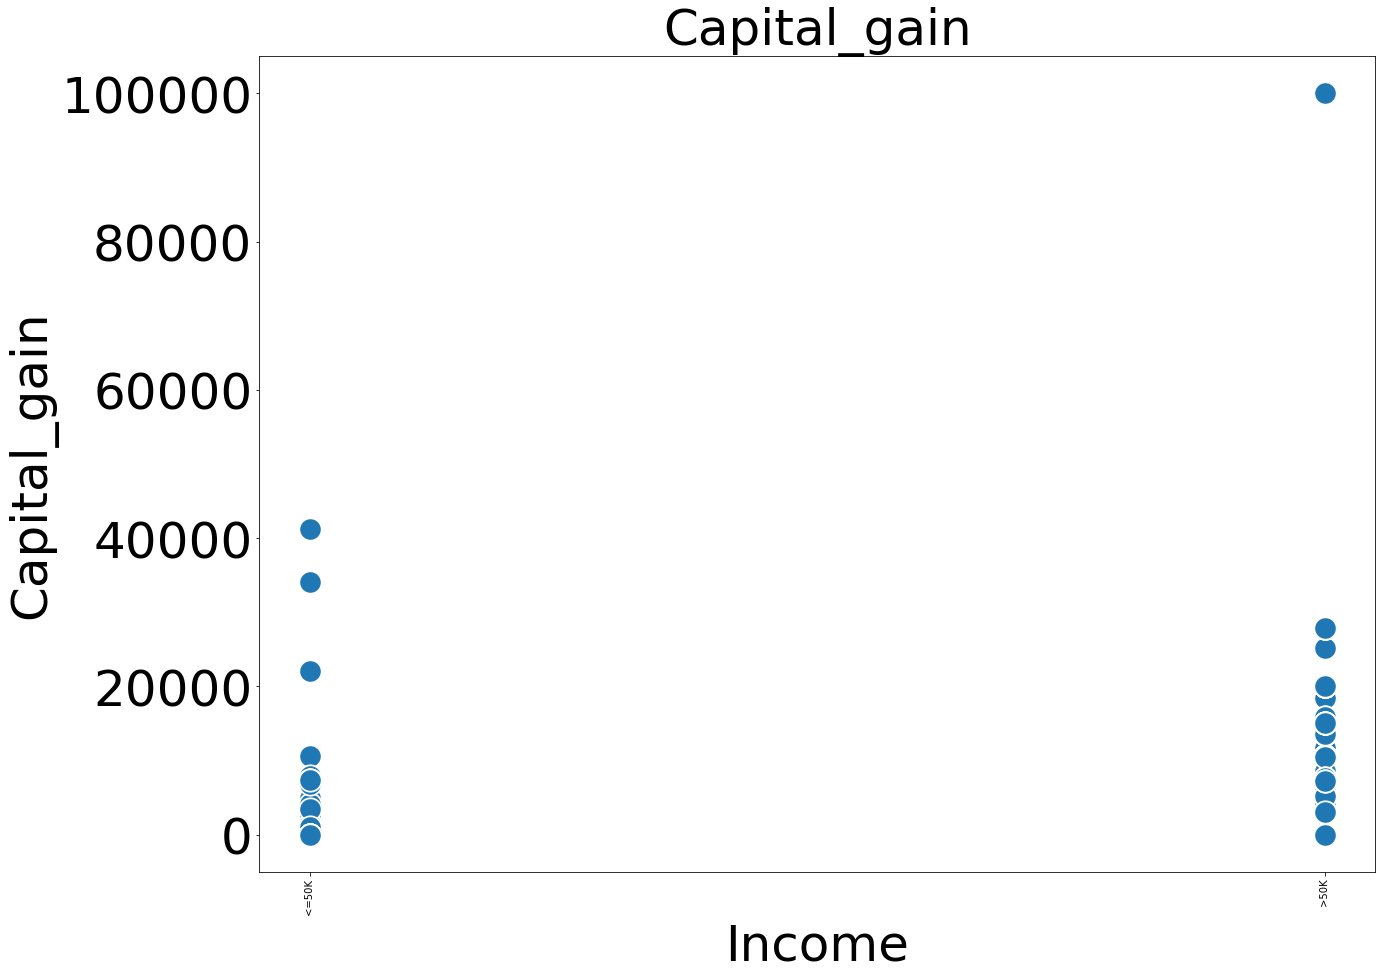

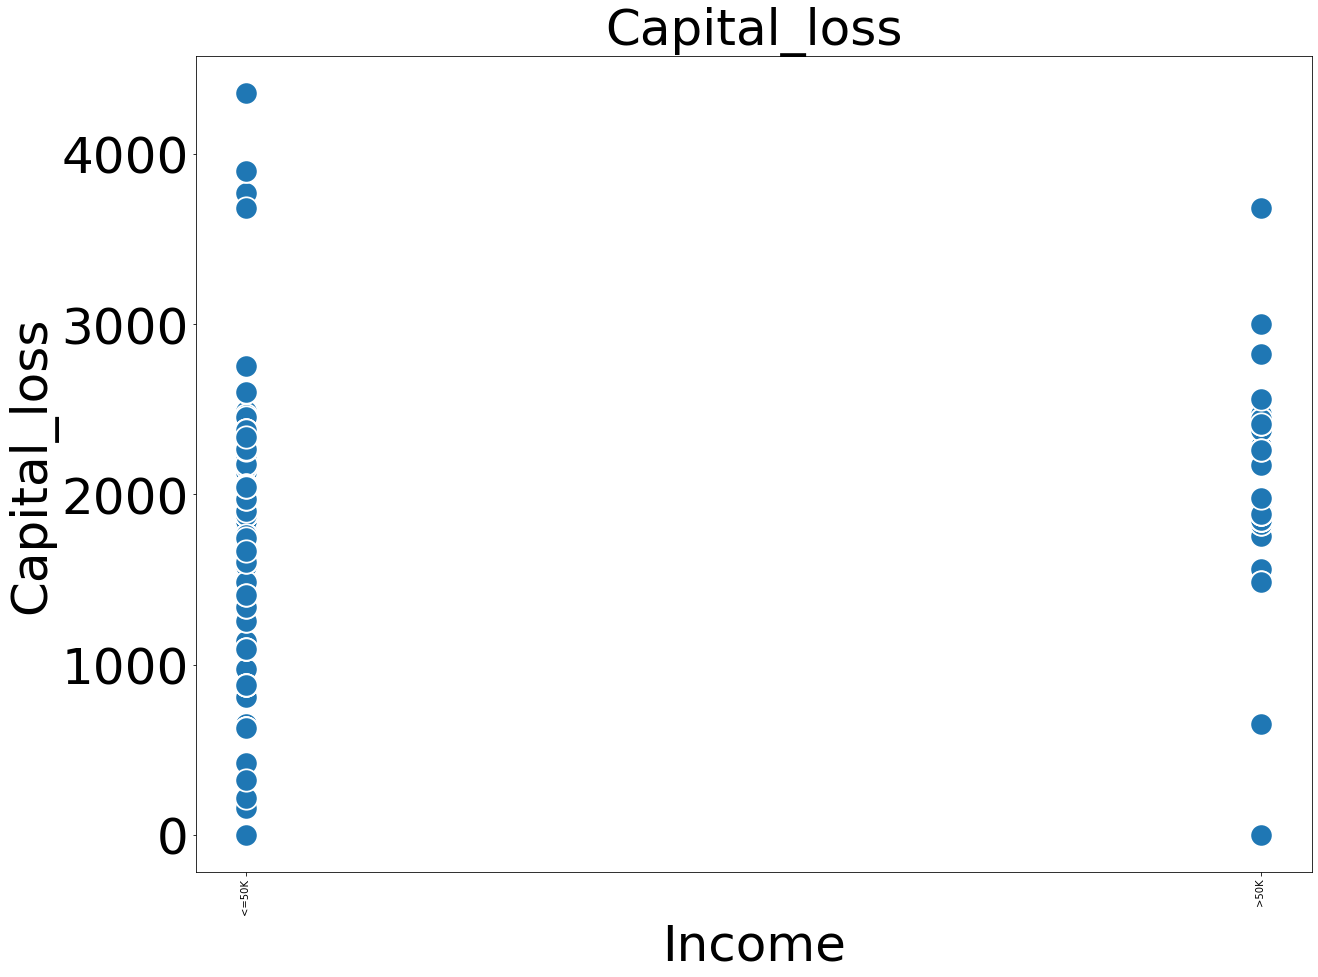

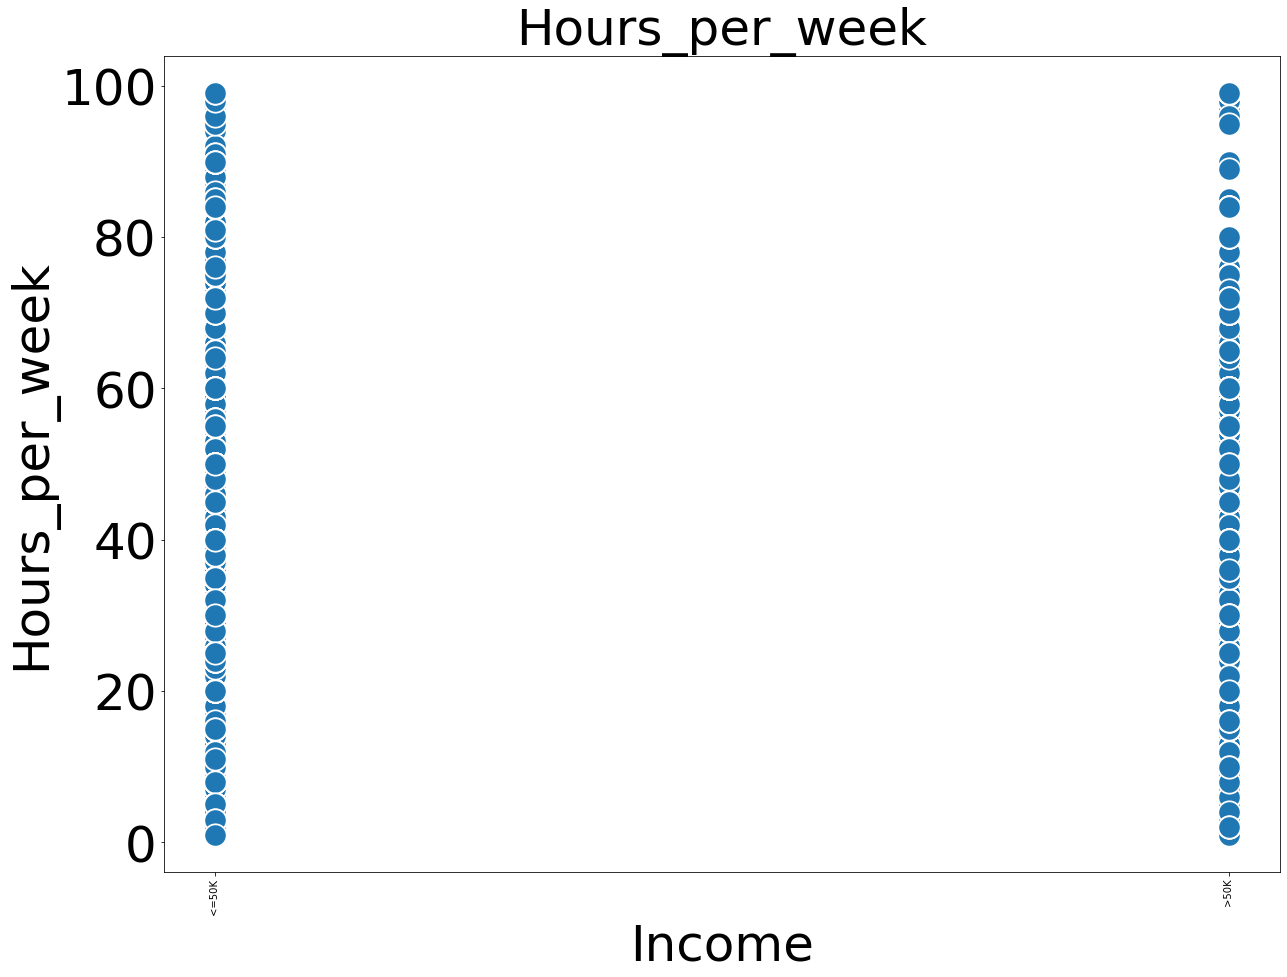

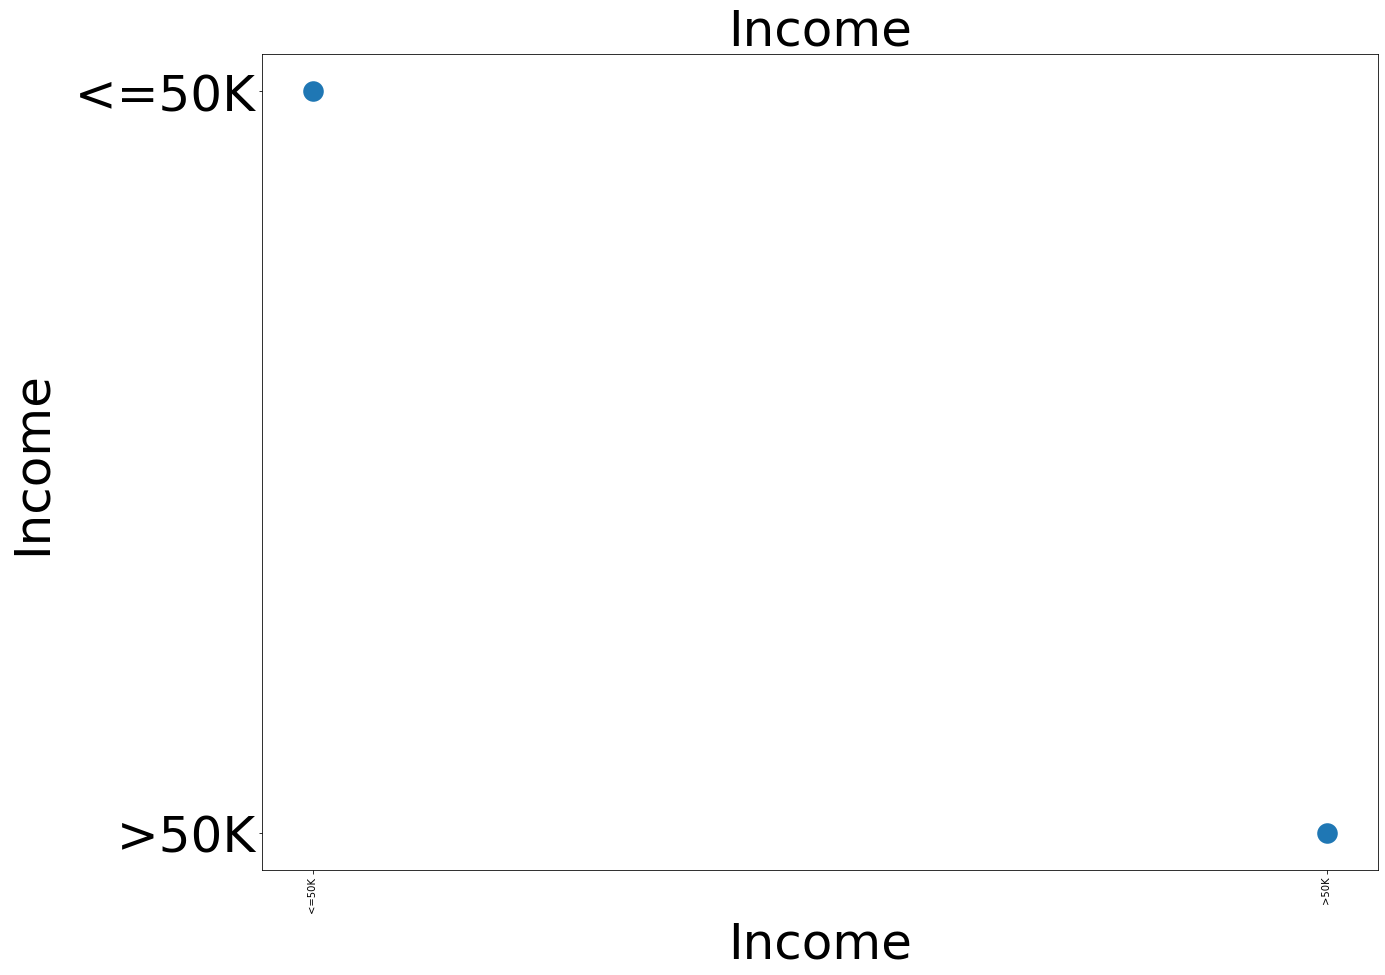

In [77]:


#plot to find relationship
for c in x:
    fig_size = (20,15)
    fig, ax = plt.subplots(figsize = fig_size)
    plt.title(c, fontsize=50)
    plt.xticks(rotation=90)
    plt.yticks(fontsize=50)
    plt.xlabel("Income",fontsize=50)
    plt.ylabel(c,fontsize=50)
    sns.scatterplot(x="Income", y=c, data=num_cen, s=500)

# Multivariate Analysis

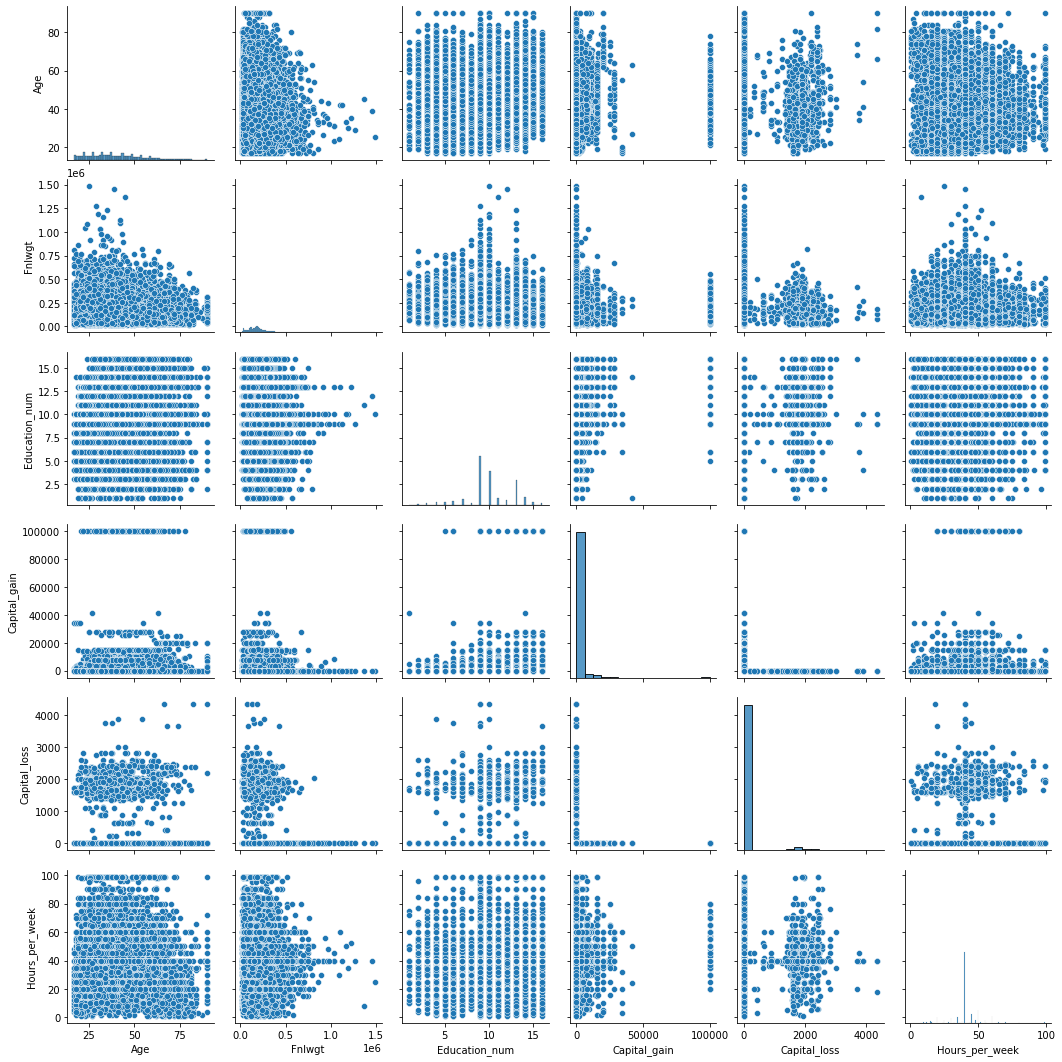

In [78]:
sns.pairplot(census)

# Label Encoding

In [80]:
census.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [81]:
census["Workclass"] = census["Workclass"].replace(" ?", "Unknown")

In [82]:
census["Native_country"] = census["Native_country"].replace(" ?", "Unknown")

In [83]:
enc =  ["Workclass",'Education', 'Native_country','Income','Sex','Marital_status', 'Occupation', 'Relationship', 'Race']

# import the labelencoder
from sklearn.preprocessing import LabelEncoder

# initialize Labelencoder
LE = LabelEncoder()

for e in enc:
    census[e] = LE.fit_transform(census[e])

In [84]:
 census.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,4,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,6,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,6,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,10,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,4,5,4,0,0,0,40,38,0


In [85]:
census.dtypes

Age               int64
Workclass         int32
Fnlwgt            int64
Education         int32
Education_num     int64
Marital_status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int32
Income            int32
dtype: object

In [87]:
cen = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income']

In [88]:
for x in cen:
    print(census.groupby("Income")[x].median())
    print("\n")

Income
0    34
1    44
Name: Age, dtype: int64


Income
0    3
1    3
Name: Workclass, dtype: int32


Income
0    179468
1    176101
Name: Fnlwgt, dtype: int64


Income
0    11
1    11
Name: Education, dtype: int32


Income
0     9
1    12
Name: Education_num, dtype: int64


Income
0    3
1    2
Name: Marital_status, dtype: int32


Income
0    7
1    7
Name: Occupation, dtype: int32


Income
0    1
1    0
Name: Relationship, dtype: int32


Income
0    4
1    4
Name: Race, dtype: int32


Income
0    1
1    1
Name: Sex, dtype: int32


Income
0    0
1    0
Name: Capital_gain, dtype: int64


Income
0    0
1    0
Name: Capital_loss, dtype: int64


Income
0    40
1    40
Name: Hours_per_week, dtype: int64


Income
0    38
1    38
Name: Native_country, dtype: int32


Income
0    0
1    1
Name: Income, dtype: int32




In [89]:
census.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.376290,1.897818e+05,10.298249,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.470823,0.240817
std,13.640642,1.581995,1.055498e+05,3.870317,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,6.083180,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,1.783630e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,48.000000,3.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


--------------------------------------
### Observation
--------------------------------------
- The Range has a big difference
- There is some difference between mean and standard deviation .

### Correlation 

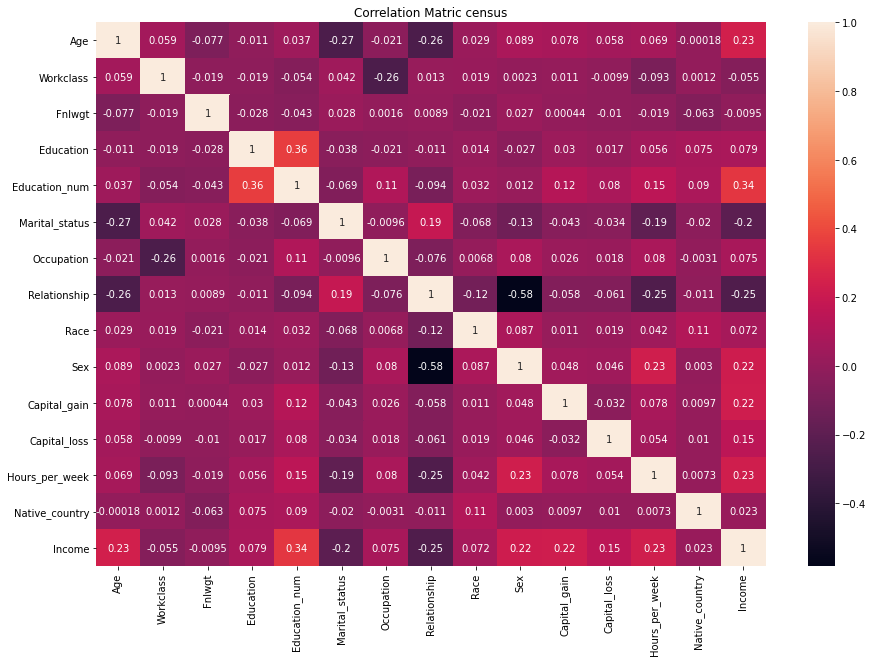

In [92]:
correlation = census.corr()
plt.figure(figsize = [15,10])
sns.heatmap(correlation, annot=True)
plt.title("Correlation Matric census")
plt.show()

In [93]:
correlation["Income"].sort_values(ascending = False)

Income            1.000000
Education_num     0.335182
Age               0.234039
Hours_per_week    0.229690
Capital_gain      0.223333
Sex               0.215995
Capital_loss      0.150523
Education         0.079311
Occupation        0.075448
Race              0.071853
Native_country    0.023159
Fnlwgt           -0.009481
Workclass        -0.055098
Marital_status   -0.199295
Relationship     -0.250924
Name: Income, dtype: float64

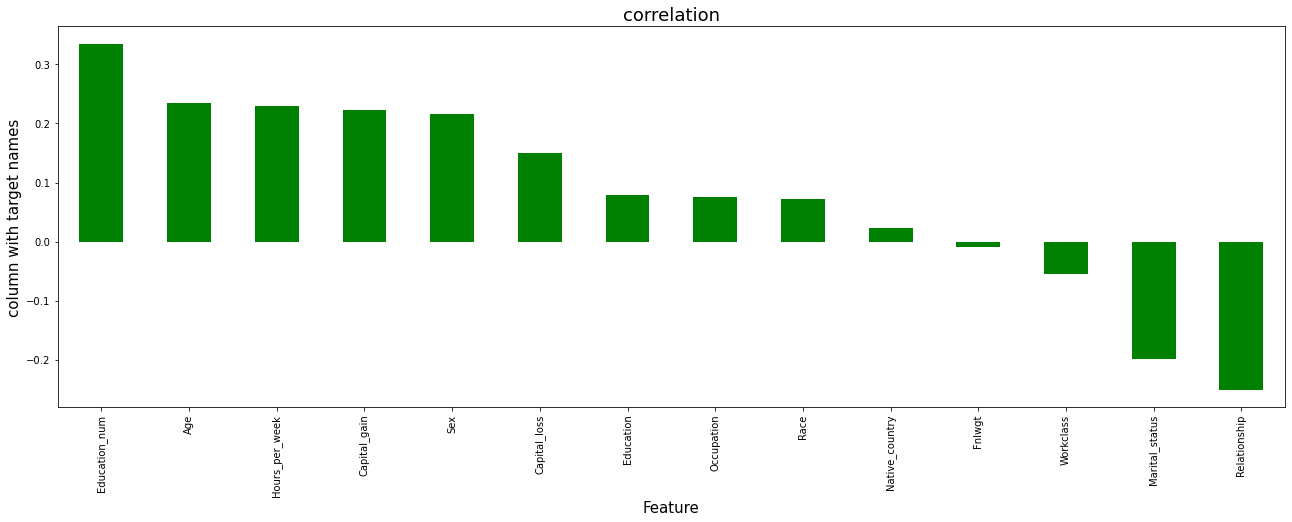

In [95]:
#Arrange feature according to correlation to target variables.
plt.figure(figsize=(22,7))
census.corr()["Income"].sort_values(ascending = False).drop(["Income"]).plot(kind = "bar", color = "g")
plt.xlabel("Feature", fontsize = 15)
plt.ylabel("column with target names", fontsize = 15)
plt.title("correlation", fontsize=18)
plt.show()

#### Observation:

- The Final weight (Fnlwgt  -0.009481) is poorly correlated with income
- Education Number is in good correlation(positively correlated)
- Relationship is negatively correlated with income

# Checking for skewness and removal

#### Check null null

In [96]:
census.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

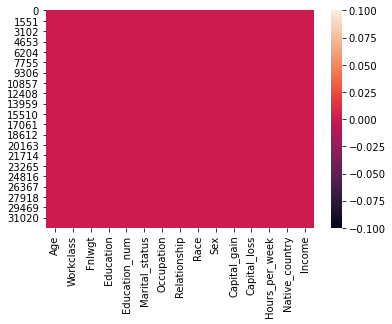

In [97]:
sns.heatmap(census.isnull())

- No null value

### Normal Distribution Check 

In [98]:
cen

['Age',
 'Workclass',
 'Fnlwgt',
 'Education',
 'Education_num',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week',
 'Native_country',
 'Income']

In [100]:
num_cen = num_cen.drop("Income", axis=1)

In [101]:
num_cen

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40
...,...,...,...,...,...,...
32555,27,257302,12,0,0,38
32556,40,154374,9,0,0,40
32557,58,151910,9,0,0,40
32558,22,201490,9,0,0,20


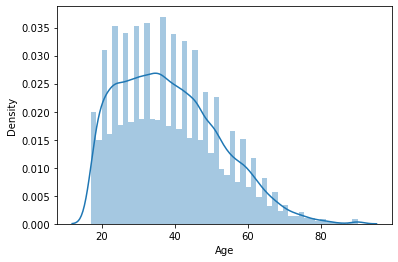

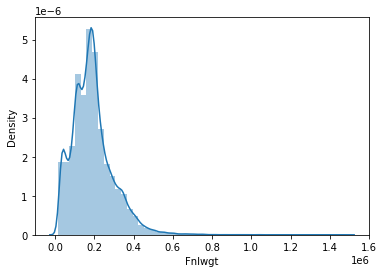

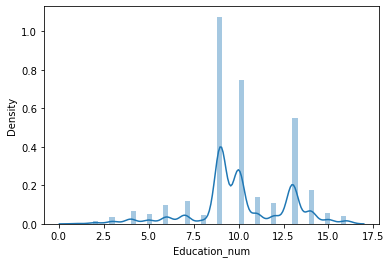

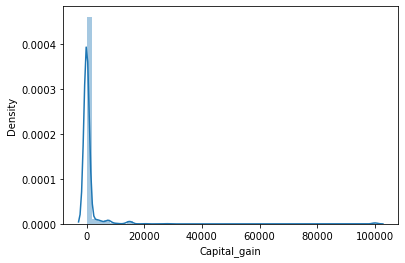

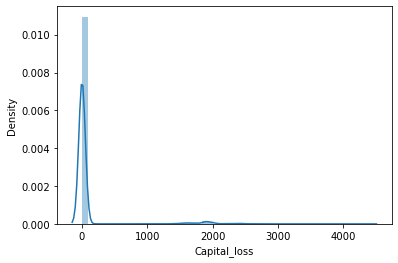

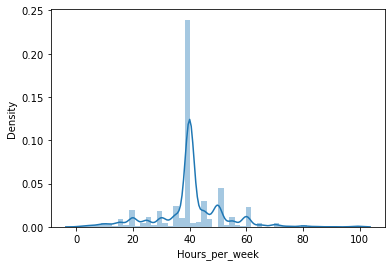

In [102]:
for val in num_cen.columns:
    sns.distplot(num_cen[val], kde=True)
    plt.show()

#### Skeness is present

In [103]:
num_cen.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

In [107]:
#import power_transform
from sklearn.preprocessing import power_transform

df = power_transform(num_cen)

df = pd.DataFrame(df, columns =num_cen.columns)

In [108]:
df.skew()

Age              -0.013897
Fnlwgt            0.016914
Education_num     0.023885
Capital_gain      3.016951
Capital_loss      4.299511
Hours_per_week    0.229556
dtype: float64

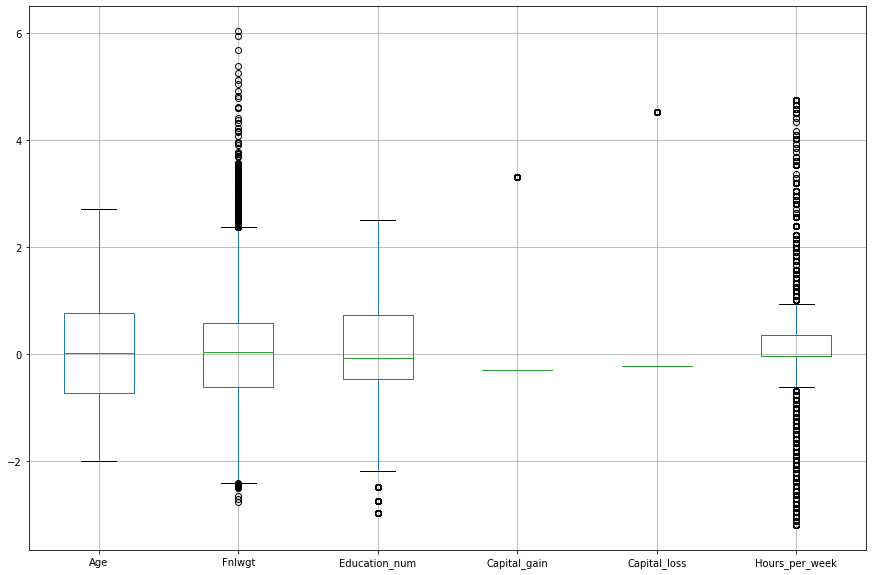

In [110]:
df.boxplot(figsize=[15,10])

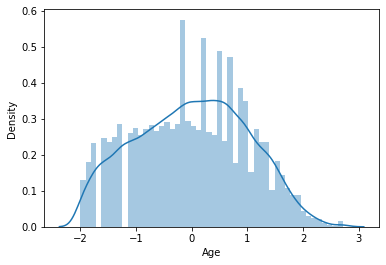

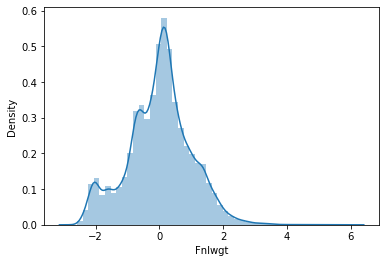

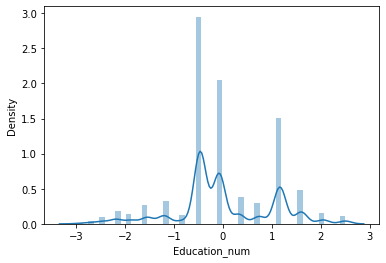

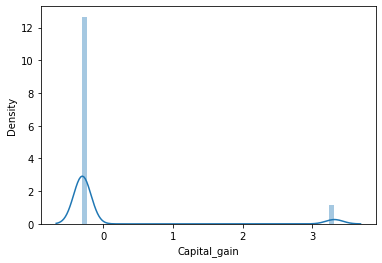

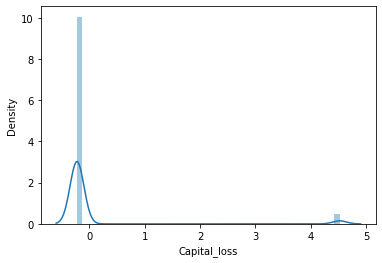

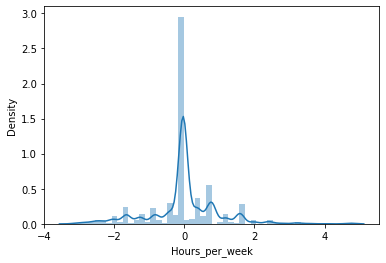

In [115]:
for val in df.columns:
    sns.distplot(df[val], kde=True)
    plt.show()

In [116]:
drop_col = [ "Capital_gain","Capital_loss"]
for x in drop_col:
    df = df.drop(x, axis=1)

In [118]:
df.columns

Index(['Age', 'Fnlwgt', 'Education_num', 'Hours_per_week'], dtype='object')

### Dropping the column

In [111]:
dictdata = {"Column_name": [ "Capital_gain","Capital_loss", "Hours_per_week"],
            "Correlation": [0.150523, 0.223333,0.229690],
           "Outliers": ["no", "no", "alot"],
           "Skewnes" : [3.016951,4.299511,0.22955]}
drop_df = pd.DataFrame(dictdata)

In [112]:
drop_df

,Column_name,Correlation,Outliers,Skewnes
0,Capital_gain,0.150523,no,3.016951
1,Capital_loss,0.223333,no,4.299511
2,Hours_per_week,0.229690,alot,0.229550


In [113]:
drop_col = [ "Capital_gain","Capital_loss"]
for x in drop_col:
    census = census.drop(x, axis=1)

In [114]:
census

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,4,0,4,1,13,38,0
1,38,3,215646,11,9,0,6,1,4,1,40,38,0
2,53,3,234721,1,7,2,6,0,2,1,40,38,0
3,28,3,338409,9,13,2,10,5,2,0,40,4,0
4,37,3,284582,12,14,2,4,5,4,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,7,12,2,13,5,4,0,38,38,0
32556,40,3,154374,11,9,2,7,0,4,1,40,38,1
32557,58,3,151910,11,9,6,1,4,4,0,40,38,0
32558,22,3,201490,11,9,4,1,3,4,1,20,38,0


In [122]:
x = ['Age', 'Fnlwgt', 'Education_num', 'Hours_per_week']
for c in x:
    census = census.drop(c, axis=1)

In [123]:
census

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,5,9,2,4,0,4,1,38,0
1,3,11,0,6,1,4,1,38,0
2,3,1,2,6,0,2,1,38,0
3,3,9,2,10,5,2,0,4,0
4,3,12,2,4,5,4,0,38,0
...,...,...,...,...,...,...,...,...,...
32555,3,7,2,13,5,4,0,38,0
32556,3,11,2,7,0,4,1,38,1
32557,3,11,6,1,4,4,0,38,0
32558,3,11,4,1,3,4,1,38,0


In [124]:
cen = pd.concat([census,df],axis=1, join="inner")

In [125]:
cen

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income,Age,Fnlwgt,Education_num,Hours_per_week
0,5,9,2,4,0,4,1,38,0,0.891947,-1.089889,1.164793,-2.221515
1,3,11,0,6,1,4,1,38,0,0.102717,0.398743,-0.464330,-0.035570
2,3,1,2,6,0,2,1,38,0,1.064381,0.562540,-1.200274,-0.035570
3,3,9,2,10,5,2,0,4,0,-0.731663,1.340398,1.164793,-0.035570
4,3,12,2,4,5,4,0,38,0,0.028023,0.957182,1.600809,-0.035570
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,3,7,2,13,5,4,0,38,0,-0.827983,0.746749,0.739697,-0.197550
32556,3,11,2,7,0,4,1,38,1,0.247374,-0.193298,-0.464330,-0.035570
32557,3,11,6,1,4,4,0,38,0,1.334556,-0.219755,-0.464330,-0.035570
32558,3,11,4,1,3,4,1,38,0,-1.358341,0.271668,-0.464330,-1.654992


- Skewness removed

# Checking for outliers and removal

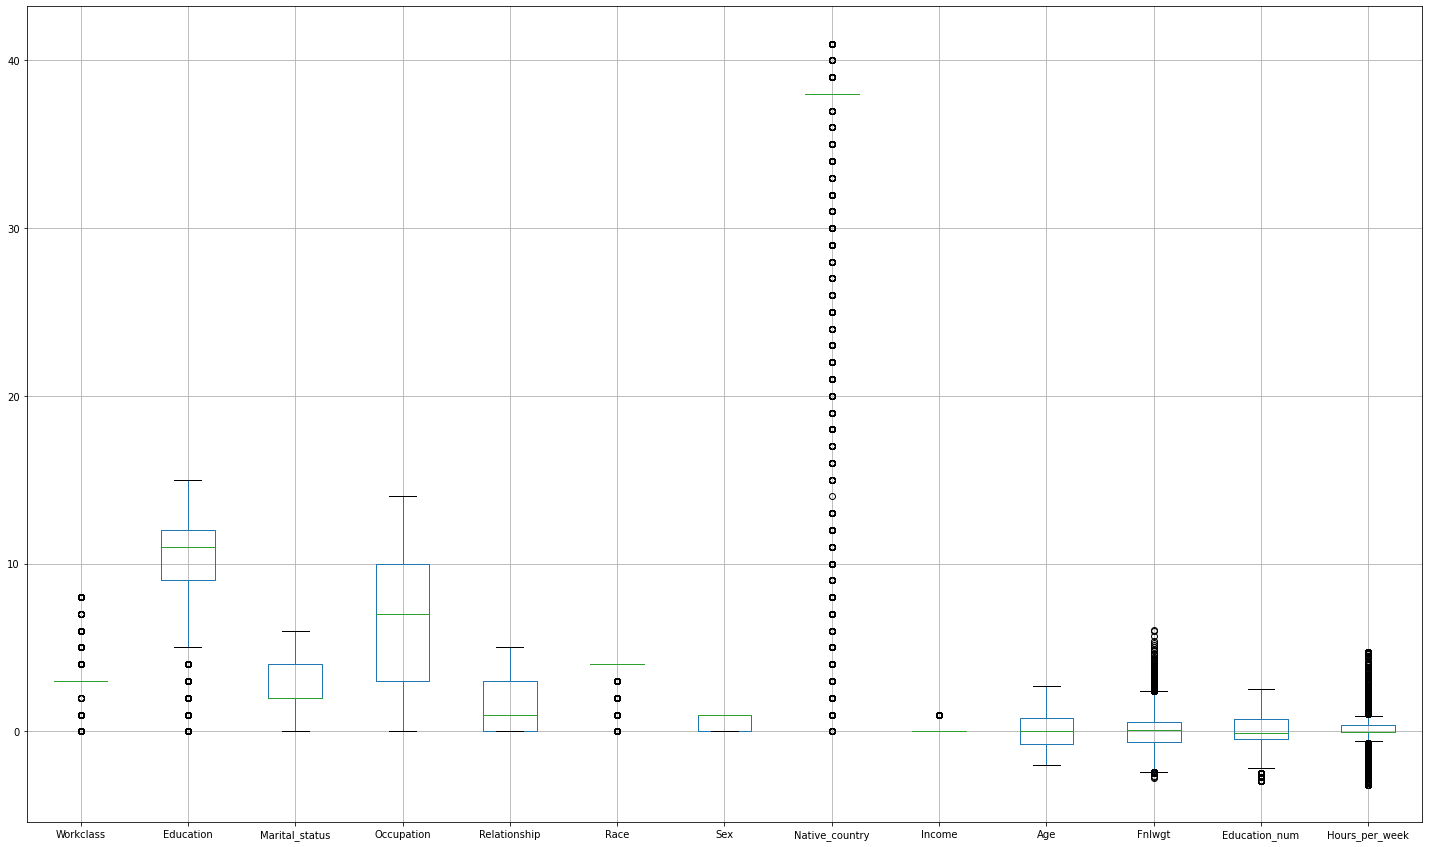

In [128]:
cen.boxplot(figsize=[25,15])

In [129]:
#removing the outliers
from scipy.stats import zscore
z= np.abs(zscore(cen))


In [130]:
threshold = 3
print(np.where(z>3))

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64), array([ 7, 12,  5, ...,  5,  5,  5], dtype=int64))


In [131]:
cen = cen[(z<3).all(axis=1)]

In [133]:
cen.shape

(29791, 13)

In [135]:
loss_percent = (32560-29791)/32560*100
print(loss_percent)


8.504299754299755


- The data loss is accessptable

# Splitting the independent and dependant variables

In [136]:
x = cen.drop("Income", axis=1)
y = cen["Income"]

In [137]:
print(x.shape)
print(y.shape)

(29791, 12)
(29791,)


In [138]:
#scaling standardize the model thus the prediction come out with accuracy
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

x =scale.fit_transform(x)
#scaled 

# Finding the best Random State

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
maxAccu = 0
maxRS = 0
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predf = LR.predict(x_test)
    acc = accuracy_score(y_test, predf)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is: ", maxAccu, " on Random State ", maxRS)

Best accuracy is:  0.8184157529648691  on Random State  806


# Finding the best algorithm

### Train/Test Split

In [140]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30, random_state = 806)
# printing the shape of train test split data
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(8938, 12)
(8938,)
(20853, 12)
(20853,)


In [141]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [142]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [143]:
model =[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]

In [145]:
for m in model:
    m.fit(x_train, y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy score of " ,m, " is: ")
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print("\n")

Accuracy score of  LogisticRegression()  is: 
0.8184157529648691
[[6358  426]
 [1197  957]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      6784
           1       0.69      0.44      0.54      2154

    accuracy                           0.82      8938
   macro avg       0.77      0.69      0.71      8938
weighted avg       0.81      0.82      0.80      8938



Accuracy score of  GaussianNB()  is: 
0.7657194003132692
[[5261 1523]
 [ 571 1583]]
              precision    recall  f1-score   support

           0       0.90      0.78      0.83      6784
           1       0.51      0.73      0.60      2154

    accuracy                           0.77      8938
   macro avg       0.71      0.76      0.72      8938
weighted avg       0.81      0.77      0.78      8938



Accuracy score of  SVC()  is: 
0.8362049675542627
[[6374  410]
 [1054 1100]]
              precision    recall  f1-score   support

           0       0.86      0.94 

In [146]:
lr = LogisticRegression()
gnb = GaussianNB()
svc = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [148]:
cross_list = [lr,gnb,svc,dt,rf]

from sklearn.model_selection import cross_val_score
for m in cross_list:
    scr = cross_val_score(m, x, y, cv = 5)
    print("the cross validation score of  model :", scr.mean())

the cross validation score of  model : 0.807727279973632
the cross validation score of  model : 0.7654997298593088
the cross validation score of  model : 0.826827074637414
the cross validation score of  model : 0.7764763029633907
the cross validation score of  model : 0.827867359934826


### Observation:
- The model performance is good for all the classification algorithm 
- Proceed with Linear regression model


# Hyper Parameter tuning 

##### Hyper Parameter tuning for Logestic regression

In [160]:
from sklearn.model_selection import GridSearchCV
c = np.logspace(-5,8,15)
param_grid = {'C':c}
GCV = GridSearchCV(LogisticRegression(), param_grid, cv=7)


In [161]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])})

In [162]:
GCV.best_params_

{'C': 0.05179474679231213}

In [163]:
prediction = GCV.best_estimator_.predict(x_test)

In [164]:
accuracy_score(y_test, prediction)

0.8179682255538152

# Saving the Model

In [165]:
import joblib
joblib.dump(GCV.best_estimator_, "censusfinal.pkl")
joblib.dump(GCV.best_estimator_, "censusfinal.obj")

['censusfinal.obj']

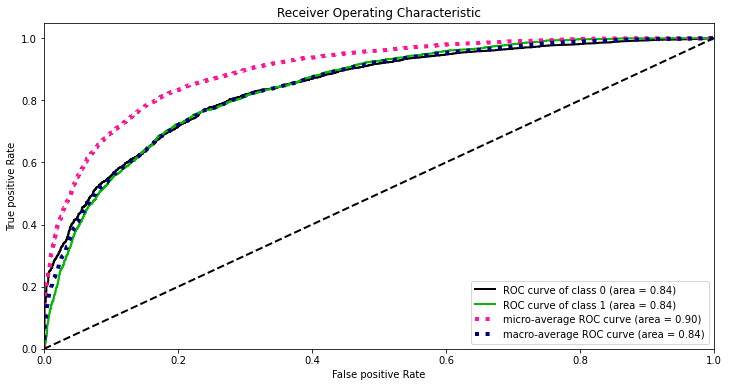

In [168]:
## Visuvalization - AUCROC curve
import scikitplot as skplt
from sklearn.metrics import roc_curve, auc

test_prob = GCV.predict_proba(x_test)

skplt.metrics.plot_roc_curve(y_test, test_prob,
                       title="Digits ROC Curve", figsize=(12,6));

plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc = "lower right")
plt.show()

# Conclusion

In [171]:
import numpy as np
a = np.array(y_test)
predicted = np.array(prediction)
df_con = pd.DataFrame({"orginal":a, "predicted":predicted}, index = range(len(a)))
df_con.head()

,orginal,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
